In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns
import numpy 
import scipy

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score
from sklearn.linear_model import LogisticRegression
from sys import getsizeof

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

from sklearn.model_selection import train_test_split
from rfpimp import *

scorer = make_scorer(f1_score, needs_proba=False,
                     greater_is_better=True,average='micro')

In [2]:
df = pd.read_csv('../input/train_values.csv')
train_target = pd.read_csv('../input/train_labels.csv')

print(Counter(train_target.damage_grade))

y = train_target.damage_grade

Counter({2: 148259, 3: 87218, 1: 25124})


In [12]:
def create_X(df):
    X = df.copy()
    
#     X['disc'] = X['ground_floor_type'].astype(str) + X['other_floor_type'].astype(str)  # new feature
    
    cat_cols = X.columns[X.dtypes == 'object']
    num_cols = [i for i in X.columns if i not in cat_cols]
    
    x1 = X[cat_cols].apply(LabelEncoder().fit_transform)
    X = pd.concat([X[num_cols], x1], axis=1)
    
    return X



In [13]:
num_cols = ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','count_families']

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()

In [16]:
X = df[num_cols]

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X = scaler.fit_transform(X)

In [11]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
np.cumsum(pca.explained_variance_ratio_)

array([0.37134145, 0.57950952, 0.77534726, 0.95596405, 1.        ])

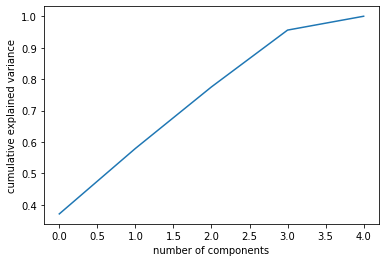

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X,y)

/data/nithish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/data/nithish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
f1_score(model.predict(X),y , average='micro')

0.5681060318264319

In [35]:
pca = PCA(2)

In [36]:
X_trans = pca.fit_transform(X)

In [37]:
model.fit(X_trans,y)
f1_score(model.predict(X_trans),y , average='micro')

/data/nithish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/data/nithish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5688734885898366

In [39]:
model = RandomForestClassifier(oob_score=True)

In [40]:
model.fit(X,y,)

/data/nithish/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/data/nithish/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/data/nithish/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/data/nithish/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
f1_score(model.predict(X),y , average='micro')

0.6085471659740369

In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC()

In [45]:
X.shape

(260601, 5)

In [ ]:
model.fit(X,y)

In [ ]:
X_1, X_2, y_1, y_2 = train_test_split(X,y,train_size=0.95)

In [25]:
model.fit(X_2, y_2)

/data/nithish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
f1_score(model.predict(X_2),y_2 , average='micro')

0.5754738700023022

In [31]:
id_cols = df.columns[:4].tolist()

In [32]:
non_id_cols = [i for i in df.columns if i not in id_cols]

In [34]:
df[non_id_cols].drop_duplicates().shape

(145516, 35)

In [35]:
df.shape

(260601, 39)